In [117]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()
# pd.set_option('display.max_rows',500)

In [118]:
raw_data = pd.read_csv('Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4


Exploring the data

In [119]:
#By default only includes numerical variables
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00,4345
unique,7,nan,6,nan,nan,4,2,nan,312
top,Volkswagen,nan,sedan,nan,nan,Diesel,yes,nan,E-Class
freq,936,nan,1649,nan,nan,2019,3947,nan,199
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55,NaN
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00,NaN
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00,NaN


In [120]:
data = raw_data.drop(['Model'],axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00
unique,7,nan,6,nan,nan,4,2,nan
top,Volkswagen,nan,sedan,nan,nan,Diesel,yes,nan
freq,936,nan,1649,nan,nan,2019,3947,nan
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00


Dealing with Missing Values

In [121]:
#Check for null Values
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [122]:
#Rule of Thumb: if you are removing <5% of the observations, you are free to just remove all that have missing values
#Method to revove missing values
data_no_mv = data.dropna(axis=0)

In [123]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.00,4025,4025.00,4025.00,4025,4025,4025.00
unique,7,nan,6,nan,nan,4,2,nan
top,Volkswagen,nan,sedan,nan,nan,Diesel,yes,nan
freq,880,nan,1534,nan,nan,1861,3654,nan
mean,NaN,19552.31,NaN,163.57,2.76,NaN,NaN,2006.38
std,NaN,25815.73,NaN,103.39,4.94,NaN,NaN,6.70
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6999.00,NaN,90.00,1.80,NaN,NaN,2003.00
50%,NaN,11500.00,NaN,158.00,2.20,NaN,NaN,2007.00
75%,NaN,21900.00,NaN,230.00,3.00,NaN,NaN,2012.00


Exploring the Probablility Distribiton Functions 

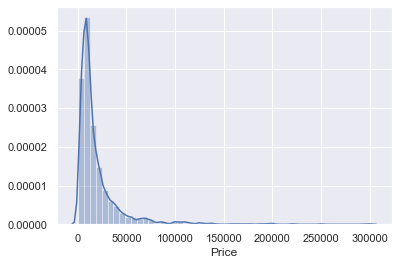

In [124]:
#For optimal results we would be looking for a normal distribution
#However for price it seems we have an exponantial distribution
#We seems to have some outliers in our data, this will affect our regression as the regression line will try to go as close as possible to the outliers.
#One way to deal with that seamlessly is to remove top 1% of the observations
sns.distplot(data_no_mv.Price)

In [125]:
#Easiest way to remove the top 1% is thorugh the quantile method
q = data_no_mv.Price.quantile(0.99)
data_1 = data_no_mv[data_no_mv.Price < q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.00,3984,3984.00,3984.00,3984,3984,3984.00
unique,7,nan,6,nan,nan,4,2,nan
top,Volkswagen,nan,sedan,nan,nan,Diesel,yes,nan
freq,880,nan,1528,nan,nan,1853,3613,nan
mean,NaN,17837.12,NaN,165.12,2.74,NaN,NaN,2006.29
std,NaN,18976.27,NaN,102.77,4.96,NaN,NaN,6.67
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6980.00,NaN,93.00,1.80,NaN,NaN,2002.75
50%,NaN,11400.00,NaN,160.00,2.20,NaN,NaN,2007.00
75%,NaN,21000.00,NaN,230.00,3.00,NaN,NaN,2011.00


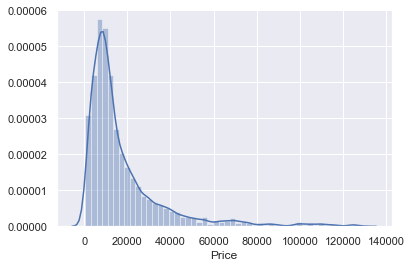

In [126]:
#Though we have still have outliers far from the mean, this is acceptable.
#Though we need to fix similar problems with mileage and engine volume and year
sns.distplot(data_1.Price)

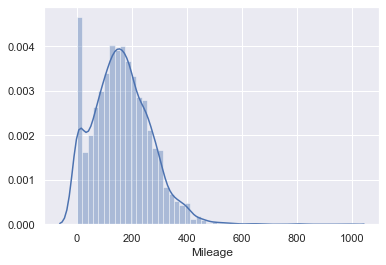

In [127]:
#Lets follow the same procedure for milege and only keep data below the 99th percentile
sns.distplot(data_no_mv.Mileage)

In [128]:
q = data_1.Mileage.quantile(.99)
data_2 = data_1[data_1.Mileage < q]

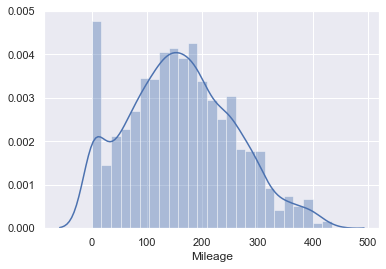

In [129]:
sns.distplot(data_2.Mileage)

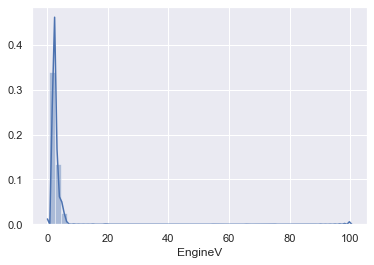

In [130]:
#Standard engine volume interval is 0.6 to 6.5, in this data though we have eninge volume of 99.99
#Note that the value 99.99 may be unconventionally used instead of NA
sns.distplot(data_no_mv.EngineV)

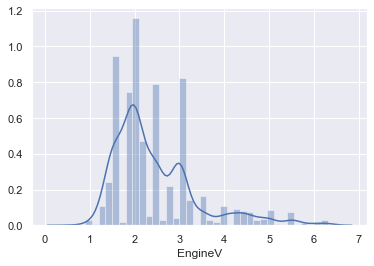

In [131]:
data_3 = data_2[data_2.EngineV < 6.5]
sns.distplot(data_3.EngineV)

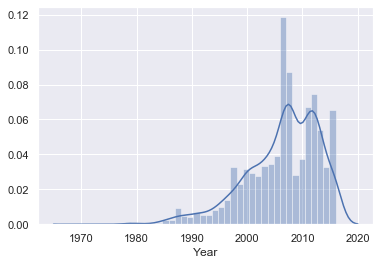

In [132]:
#For year we seem to have some vintage cars, so we will remove the 1st quantile
sns.distplot(data_no_mv.Year)

In [133]:
q = data_3.Year.quantile(0.01)
data_4 = data_3[data_3.Year > q]

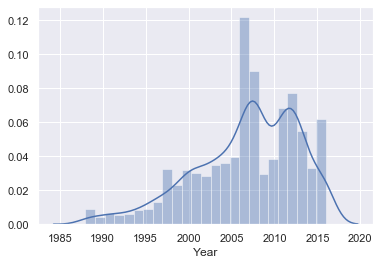

In [134]:
sns.distplot(data_4.Year)

In [135]:
#Create a new variable and reset the index
data_4

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.00,van,163,2.50,Diesel,yes,2008
4339,Toyota,17900.00,sedan,35,1.60,Petrol,yes,2014
4340,Mercedes-Benz,125000.00,sedan,9,3.00,Diesel,yes,2014
4341,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999


In [136]:
#drop=True : completly forget old index
data_cleaned = data_4.reset_index(drop=True)
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.00,van,163,2.50,Diesel,yes,2008
3863,Toyota,17900.00,sedan,35,1.60,Petrol,yes,2014
3864,Mercedes-Benz,125000.00,sedan,9,3.00,Diesel,yes,2014
3865,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999


In [137]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.00,3867,3867.00,3867.00,3867,3867,3867.00
unique,7,nan,6,nan,nan,4,2,nan
top,Volkswagen,nan,sedan,nan,nan,Diesel,yes,nan
freq,848,nan,1467,nan,nan,1807,3505,nan
mean,NaN,18194.46,NaN,160.54,2.45,NaN,NaN,2006.71
std,NaN,19085.86,NaN,95.63,0.95,NaN,NaN,6.10
min,NaN,800.00,NaN,0.00,0.60,NaN,NaN,1988.00
25%,NaN,7200.00,NaN,91.00,1.80,NaN,NaN,2003.00
50%,NaN,11700.00,NaN,157.00,2.20,NaN,NaN,2008.00
75%,NaN,21700.00,NaN,225.00,3.00,NaN,NaN,2012.00


Checking OLS Assumptions

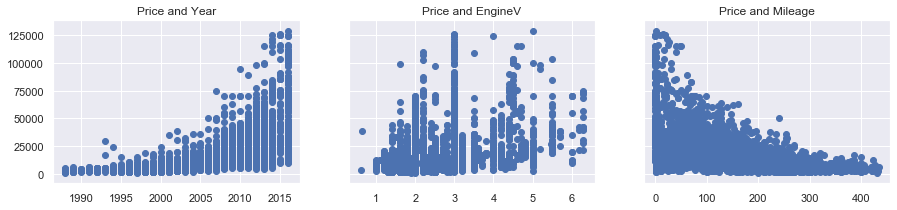

In [138]:
f, (ax1, ax2, ax3) = plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned.Year,data_cleaned.Price)
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned.EngineV,data_cleaned.Price)
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned.Mileage,data_cleaned.Price)
ax3.set_title('Price and Mileage')

#We can spot patterns but not linear ones,we cannot run a linear regression in this case
#We should first transform one or more variables
plt.show()

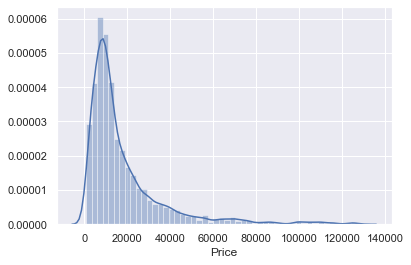

In [139]:
#Recall the graph Price and notice that it is not normally distributed and its relation with other normally distributed features is not linear.
#The patterns are quite exponential
#Log transformation is a common way to deal with such issues and especially usefull when facing exponential relationships
sns.distplot(data_cleaned.Price)

Relaxing the assumptions(log transformation Price)

In [140]:
log_price = np.log(data_cleaned.Price)
data_cleaned['Log_Price'] = log_price

In [141]:
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Log_Price
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,8.34
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,8.97
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,9.50
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,10.04
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,9.81
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.00,van,163,2.50,Diesel,yes,2008,9.35
3863,Toyota,17900.00,sedan,35,1.60,Petrol,yes,2014,9.79
3864,Mercedes-Benz,125000.00,sedan,9,3.00,Diesel,yes,2014,11.74
3865,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999,8.78


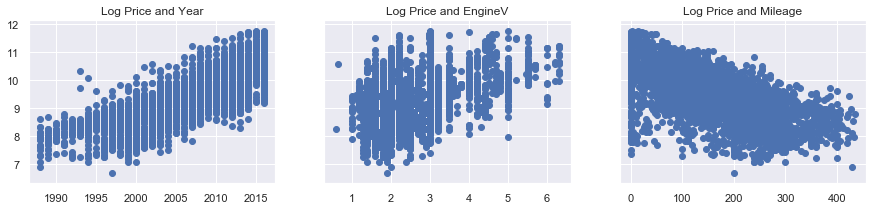

In [142]:
#Lets plot them again
f, (ax1, ax2, ax3) = plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned.Year,data_cleaned.Log_Price)
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned.EngineV,data_cleaned.Log_Price)
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned.Mileage,data_cleaned.Log_Price)
ax3.set_title('Log Price and Mileage')

plt.show()
#We can see a linear pattern in all plots now

In [143]:
#Lets drop the original price column from the data frame since its no longer needed
data_cleaned = data_cleaned.drop(['Price'],axis=1)

In [144]:
data_cleaned

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Log_Price
0,BMW,sedan,277,2.00,Petrol,yes,1991,8.34
1,Mercedes-Benz,van,427,2.90,Diesel,yes,1999,8.97
2,Mercedes-Benz,sedan,358,5.00,Gas,yes,2003,9.50
3,Audi,crossover,240,4.20,Petrol,yes,2007,10.04
4,Toyota,crossover,120,2.00,Petrol,yes,2011,9.81
...,...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.50,Diesel,yes,2008,9.35
3863,Toyota,sedan,35,1.60,Petrol,yes,2014,9.79
3864,Mercedes-Benz,sedan,9,3.00,Diesel,yes,2014,11.74
3865,BMW,sedan,1,3.50,Petrol,yes,1999,8.78


<b>No Endogenity Assumption:</b> There are tests to check if it is violated or one can take the residuals and find their correlation with each independent x, the instructor says the assumption is not violated, we can discuss the residuals after the regression has been created

<b>Normality and Homoscedasticity Assumption:</b><br>
-Normality is Assumed for big samples following the Central Limit Theorem<br>
-Zero mean of the distribution of errors is accomplished due to the inclusion of the intercept in the regression<br>
-Homoscedasticity: Assumption generally holds we we can see in the graphs, the reason for that is that we already implemented a log transformation

<b>No Autocorrelation: </b> We don't have to worry much about this since the data is not coming from time series or panel data, they are simply a snapshot of the current situation at a  second hand car sales website, each row corresponds to a different customer who is willing to sell their car through this platform, logically there is no reason for the observations to be dependent on each other.

<b>Multicollinearity</b>

In [145]:
#Check for Multicollinearity
#It is logical that the year and mileage will be correlated, therefore we have to expect some sort of multicollinearity in the data
#Unfortunately SkLearn does not have a dedicated method to check this assumption, we must make use of statsmodels.
#One of the best ways to check for multicollinearity is through VIF(Variance Inflation fator)
#VIF produces a measure which estimates how much larger the sqrt of the standard error of an estimate is compared to a situation where the variable was completely uncorrelated with the other predictors

In [146]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [147]:
#vif range from 1 to +inf:
    # vif = 1 = no multicollinearity
    # 1 < vif <5: perfectly okay
    # 5 or 6 or 10 < vif : unacceptable (no firm consensus)
#You rarely will find data so perfect that all features will have a vif < 5, so for our example it seems year is too correlated with the other variables, so we will remove Year
vif

,VIF,features
0,3.79,Mileage
1,10.35,Year
2,7.66,EngineV


In [148]:
data_no_multicollinearity  = data_cleaned.drop(['Year'],axis=1)

In [149]:
data_no_multicollinearity

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Log_Price
0,BMW,sedan,277,2.00,Petrol,yes,8.34
1,Mercedes-Benz,van,427,2.90,Diesel,yes,8.97
2,Mercedes-Benz,sedan,358,5.00,Gas,yes,9.50
3,Audi,crossover,240,4.20,Petrol,yes,10.04
4,Toyota,crossover,120,2.00,Petrol,yes,9.81
...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.50,Diesel,yes,9.35
3863,Toyota,sedan,35,1.60,Petrol,yes,9.79
3864,Mercedes-Benz,sedan,9,3.00,Diesel,yes,11.74
3865,BMW,sedan,1,3.50,Petrol,yes,8.78


<b>Create dummy variables</b>

In [150]:
#pd.get_dummmies(...) spots all categorical variables and creates dummies automatically
#Remember for N categories for a feature we will have N-1 Dummies, to avoid multicollinearity in the regression..

data_with_dummies = pd.get_dummies(data_no_multicollinearity,drop_first=True) #drop_first : Ensure no dummy is creted for first category

In [151]:
data_with_dummies

,Mileage,EngineV,Log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.00,8.34,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.90,8.97,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.00,9.50,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.20,10.04,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.00,9.81,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.50,9.35,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,35,1.60,9.79,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,9,3.00,11.74,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,1,3.50,8.78,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


<b>Check VIF for dummies</b>

In [152]:
variables_with_dummy = data_with_dummies[['Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes']]

vif2 = pd.DataFrame()
vif2['VIF'] = [variance_inflation_factor(variables_with_dummy.values,i) for i in range(variables_with_dummy.shape[1])]
vif2['features'] = variables_with_dummy.columns

In [153]:
# data_with_dummies2 = pd.get_dummies(data_no_multicollinearity)
# data_with_dummies2.columns

In [154]:
# variables_with_dummy2 = data_with_dummies2[['Mileage', 'EngineV','Brand_Audi', 'Brand_BMW',
#        'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
#        'Brand_Toyota', 'Brand_Volkswagen', 'Body_crossover', 'Body_hatch',
#        'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
#        'Engine Type_Diesel', 'Engine Type_Gas', 'Engine Type_Other',
#        'Engine Type_Petrol', 'Registration_no', 'Registration_yes']]

# vif3 = pd.DataFrame()
# vif3['VIF'] = [variance_inflation_factor(variables_with_dummy2.values,i) for i in range(variables_with_dummy2.shape[1])]
# vif3['features'] = variables_with_dummy2.columns

In [155]:
# vif3

In [156]:
#vif range from 1 to +inf:
    # vif = 1 = no multicollinearity
    # 1 < vif <5: perfectly okay
    # 5 or 6 or 10 < vif : unacceptable (no firm consensus)
#You rarely will find data so perfect that all features will have a vif < 5
vif2

,VIF,features
0,4.46,Mileage
1,7.84,EngineV
2,2.29,Brand_BMW
3,2.87,Brand_Mercedes-Benz
4,1.64,Brand_Mitsubishi
5,2.09,Brand_Renault
6,2.16,Brand_Toyota
7,2.84,Brand_Volkswagen
8,1.46,Body_hatch
9,1.53,Body_other


<b>Rearrange a lil bit</b>

In [157]:
data_with_dummies.columns

Index(['Mileage', 'EngineV', 'Log_Price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

In [158]:
cols = ['Log_Price','Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes']

In [159]:
data_preporcessed = data_with_dummies[cols]

In [160]:
data_preporcessed

,Log_Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.34,277,2.00,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.97,427,2.90,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.50,358,5.00,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.04,240,4.20,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.81,120,2.00,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,9.35,163,2.50,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,9.79,35,1.60,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,11.74,9,3.00,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,8.78,1,3.50,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


<b>Linear Regression Model</b>

In [161]:
targets = data_preporcessed['Log_Price']
inputs = data_preporcessed.drop(['Log_Price'],axis=1)

In [162]:
#Scale our data:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [163]:
scaler.fit(inputs,targets)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [164]:
#Note: it is not usually recommended to standardize dummy variables
#Scaling has no effect on the predictive power of dummies,once scaled,though, they lose all their dummy meaning
inputs_scaled = scaler.transform(inputs)

<b>Train Test Split</b>

In [165]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled,targets,test_size=0.2,random_state=46)

<b>Create the regression</b>

In [166]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [167]:
y_hat = reg.predict(x_train)

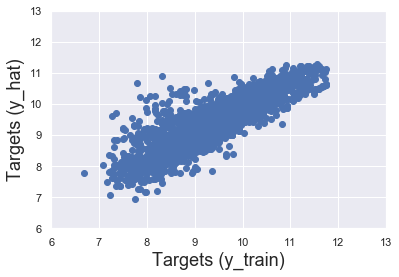

In [168]:
#A simple way to check out final result is to plot the predicted values against our observed value
plt.scatter(y_train,y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Targets (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()
#If a taget is 7, we also want the prediction to be 7 and so on,the closer our results are to the 45deg line, the better the model

Text(0.5, 1.0, 'Residuals PDF')

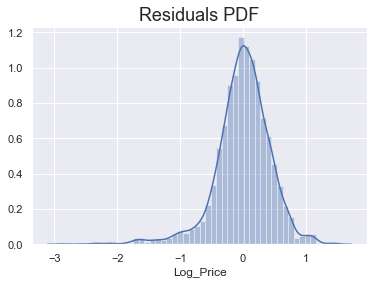

In [169]:
#Residual Plot : difference between the targets and the predictions
#The residuals are the estimate of errors hence we expect a normal dist of residuals
sns.distplot(y_train - y_hat)
plt.title('Residuals PDF',size=18)
#However there are certain observations for which (y_train - y_hat) is much lower than the mean(a much higher price is predicted than is observed)
#Given that there are nbo observations on the right side, we can say that the model rarely underestimates the targets.

In [170]:
#R-Squared
reg.score(x_train,y_train)
#Our model is explaining 75% variability of the data

0.7429325703714866

<b>Find the weights and bias</b>

In [171]:
reg.intercept_

9.417366473448338

In [172]:
reg.coef_

array([-0.45037795,  0.21150148,  0.01538818,  0.01906661, -0.13060019,
       -0.17807591, -0.05654681, -0.08407399, -0.14778598, -0.09796332,
       -0.20721734, -0.1316229 , -0.16929785, -0.12915796, -0.0265338 ,
       -0.1492882 ,  0.31156004])

In [173]:
reg_summary = pd.DataFrame(inputs.columns.values,columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary
#Keep in mind that the price is a logarithm and the features are standardized but let's work with what we have
#Weights Interpretation:
#(Continuous Variables)
#1. A positive weight shows that as a feature increases in value, so do the Log_price and 'Price' respectively
#2. A negative weight shows that as a feature increases in value, the Log_price and 'Price' decrease.

#(Dummy Variables)
#1. A positive weight shows that the respective category (eg:Brand) is more expensive than the benchmark (Audi)
#2. A negative weight shows that the respective category (eg:Brand) is less expensive than the benchmark (Audi)

#The bigger the weight, the bigger the impact, hence it seems Mileage is prominent feature in this regression, it is twice as important as Engine Volume 
#It does'nt make sense to compare continuos variables with dummies, dummies are compared with the benchmark dummies for the respective discrete variable

,Features,Weights
0,Mileage,-0.45
1,EngineV,0.21
2,Brand_BMW,0.02
3,Brand_Mercedes-Benz,0.02
4,Brand_Mitsubishi,-0.13
5,Brand_Renault,-0.18
6,Brand_Toyota,-0.06
7,Brand_Volkswagen,-0.08
8,Body_hatch,-0.15
9,Body_other,-0.10


<b>Testing</b>

In [174]:
y_hat_test = reg.predict(x_test)


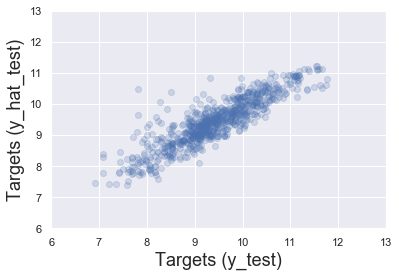

In [175]:
#alpha will show the proportional opacity of the point
plt.scatter(y_test,y_hat_test,alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Targets (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()
#We can notice that for higher prices the prediction seems good, but for lower ones it is not so good, they are more scattered meaning we are not getting the prices right

In [176]:
#Dataframe performance:
#However these are log prices, we prefer actual prices not logarithms, to reverse this we can find the expotential of the log with the exp method
df_pf = pd.DataFrame(np.exp(y_hat_test),columns=['Prediction'])
df_pf.head()


,Prediction
0,12951.17
1,2648.34
2,8472.96
3,3939.48
4,14868.05


In [177]:
df_pf['Target'] = np.exp(y_test)
df_pf
#Somehow we have a lot of missing values, the reason for that is because pandas tried to match the indexing.
#When we split the data into train and test, the original indices were preserved, so we need to remove them
y_test = y_test.reset_index(drop=True)

In [178]:
y_test

0      9.26
1      8.04
2      8.78
3      8.80
4      9.60
5     10.45
6      7.97
7      8.95
8     10.69
9      9.79
10     8.82
11    10.61
12     7.50
13    10.36
14     8.61
15    10.69
16     8.09
17     7.60
18     9.10
19     9.46
20     9.98
21     8.24
22     8.96
23     9.08
24     8.68
25     9.07
26     9.13
27     8.07
28     8.04
29     8.41
30     8.88
31     8.19
32     9.92
33     9.83
34     9.88
35     8.10
36     8.91
37    10.99
38    11.36
39     7.94
40     9.71
41     9.88
42     9.77
43    10.21
44     8.01
45    11.65
46     9.66
47     9.23
48     9.39
49     7.58
50     9.49
51     8.39
52     8.58
53     7.60
54     9.31
55     9.13
56     8.92
57     8.90
58     9.21
59     9.37
60     9.82
61    10.08
62     9.10
63    10.31
64     8.97
65     9.49
66     9.12
67     7.82
68     7.82
69    10.29
70     9.20
71     9.46
72     9.85
73     8.91
74    10.11
75     9.90
76     8.70
77     9.35
78    10.45
79     7.70
80     9.63
81     9.65
82     9.32
83  

In [179]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,12951.17,10500.00
1,2648.34,3099.00
2,8472.96,6500.00
3,3939.48,6650.00
4,14868.05,14700.00
5,44858.60,34400.00
6,3574.20,2900.00
7,19632.11,7700.00
8,41832.03,44000.00
9,17102.68,17900.00


In [180]:
#Diff between Prediction and Targets
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf

,Prediction,Target,Residual
0,12951.17,10500.00,-2451.17
1,2648.34,3099.00,450.66
2,8472.96,6500.00,-1972.96
3,3939.48,6650.00,2710.52
4,14868.05,14700.00,-168.05
5,44858.60,34400.00,-10458.60
6,3574.20,2900.00,-674.20
7,19632.11,7700.00,-11932.11
8,41832.03,44000.00,2167.97
9,17102.68,17900.00,797.32


In [181]:
#Difference expressed in percentages
df_pf['Differences'] = np.absolute((df_pf['Residual'] / df_pf['Target']) * 100)
df_pf

,Prediction,Target,Residual,Differences
0,12951.17,10500.00,-2451.17,23.34
1,2648.34,3099.00,450.66,14.54
2,8472.96,6500.00,-1972.96,30.35
3,3939.48,6650.00,2710.52,40.76
4,14868.05,14700.00,-168.05,1.14
5,44858.60,34400.00,-10458.60,30.40
6,3574.20,2900.00,-674.20,23.25
7,19632.11,7700.00,-11932.11,154.96
8,41832.03,44000.00,2167.97,4.93
9,17102.68,17900.00,797.32,4.45


In [182]:
#To evalute the performance we could see the descriptive statistics of the data frame:
df_pf.describe()

,Prediction,Target,Residual,Differences
count,774.00,774.00,774.00,774.00
mean,16222.21,17959.05,1736.84,35.46
std,12969.92,18708.08,10057.84,67.29
min,1624.72,999.00,-38562.56,0.05
25%,7699.75,7400.00,-2031.92,9.97
50%,12078.10,11500.00,158.30,23.22
75%,20645.72,21900.00,3122.48,38.44
max,75502.43,129222.00,84752.98,1300.81


In [183]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format',lambda x: '%.2f' % x) #Show up to two decimal digits.
df_pf.sort_values(by=['Differences'])
#We seem to notice that the for the last few observations, we are predicting the car price to be higher than it actually is, this could be due to some missing important factor which drives the price of a used car lower,
#It may be the model of the car we removed in the beginning of the analysis,
#Or it may also be that the car was damaged in some way

##How to improve our model:
#    1. use a different set of variables
#    2. remove a bigger part of the outliers
#    3. use different kind of transformations

,Prediction,Target,Residual,Differences
100,8204.17,8200.00,-4.17,0.05
196,10485.18,10499.00,13.82,0.13
234,21371.00,21335.00,-36.00,0.17
354,13168.38,13200.00,31.62,0.24
462,24825.69,24900.00,74.31,0.30
307,3761.20,3750.00,-11.20,0.30
699,7874.06,7900.00,25.94,0.33
111,42650.20,42500.00,-150.20,0.35
212,9736.94,9700.00,-36.94,0.38
145,29666.37,29500.00,-166.37,0.56


<b>The model we just created is not outstanding, The creation of a truly great model for a certain problem may consume months or even years. Machine Learning requires us to revisit the model many times before we are truly happy with the result</b>